In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import statsmodels as sm
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

<Figure size 1440x1280 with 0 Axes>

In [2]:
df = pd.read_csv('lab_zaliczenie/data/sex_weight_haight.csv')
df.sample(5)

,Gender,Height,Weight
3496,Male,69.296830,185.649086
1973,Male,66.863040,189.409124
4962,Male,70.144763,194.831396
5683,Female,65.800028,151.556946
6707,Female,56.789386,95.328088


In [3]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


## Podiał zbioru na płci

In [4]:
df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']

In [5]:
df_male.describe()

,Height,Weight
count,5000.000000,5000.000000
mean,69.026346,187.020621
std,2.863362,19.781155
min,58.406905,112.902939
25%,67.174679,173.887767
50%,69.027709,187.033546
75%,70.988744,200.357802
max,78.998742,269.989699


In [27]:
df_female.describe()

,Height,Weight
count,5000.000000,5000.000000
mean,63.708774,135.860093
std,2.696284,19.022468
min,54.263133,64.700127
25%,61.894441,122.934096
50%,63.730924,136.117583
75%,65.563565,148.810926
max,73.389586,202.237214


## Analiza wagi i wzrosu mężczyzn

#### Podstawowe parametry danych wejściowych 

In [6]:
male_max_w = max(df_male['Weight'])
male_max_h = max(df_male['Height'])
male_w = df_male['Weight'].to_numpy()
male_h = df_male['Height'].to_numpy()

male_h_std = df_male['Height'].to_numpy().std()
male_h_mean = df_male['Height'].mean()
male_w_std = df_male['Weight'].to_numpy().std()
male_w_mean = df_male['Weight'].mean()

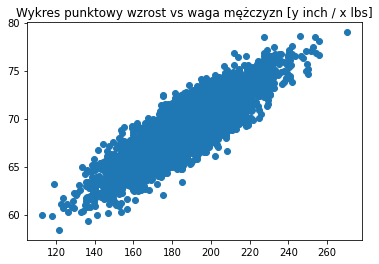

In [7]:
plt.title("Wykres punktowy wzrost vs waga mężczyzn [y inch / x lbs]")
plt.scatter(male_w, male_h)
plt.show()

In [8]:
interval_w  = 1
start_w = 100
male_bins_w = np.arange(start_w, male_max_w, interval_w)
male_w_by_interval = df_male.groupby(pd.cut(df_male['Weight'], male_bins_w)).count()

In [9]:
male_n_w = np.linspace(start_w, start_w + len(male_bins_w), len(male_bins_w) - 1)
male_w_grouped = male_w_by_interval['Weight']

In [10]:
# utworzenie wyktresu o rozkładzie normalnym dla wagi
m_w, sigma_w = male_w_mean, male_w_std
s = np.random.normal(m_w, sigma_w, len(df_male))
male_std_n_w = np.linspace(start_w, start_w + len(male_bins_w), len(male_bins_w) - 1)
pdf_w_df = pd.DataFrame({'pdf_w': s})
pdf_w_by_interval = pdf_w_df.groupby(pd.cut(pdf_w_df['pdf_w'], male_bins_w)).count()
pdf_w_grouped = pdf_w_by_interval['pdf_w']

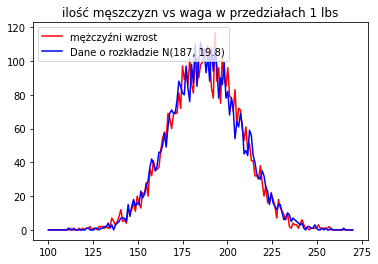

In [11]:
plt.title(f"ilość męszczyzn vs waga w przedziałach {interval_w} lbs")
plt.plot(male_n_w, male_w_grouped, "-r", label=f"mężczyźni wzrost")
plt.plot(male_std_n_w, pdf_w_grouped, "-b", label=f"Dane o rozkładzie N({m_w:.0f}, {sigma_w:.1f})")
plt.legend(loc="upper left")
plt.show()

In [12]:
interval_h  = 1
start = 55
male_bins_h = np.arange(start, male_max_h, interval_h)
male_h_by_interval = df_male.groupby(pd.cut(df_male['Height'], male_bins_h)).count()
male_n_h = np.linspace(start, start + len(male_bins_h), len(male_bins_h) - 1)
male_h_grouped = male_h_by_interval['Height']

In [13]:
# utworzenie wyktresu o rozkładzie normalnym dla wzrostu
m_h, sigma_h = male_h_mean, male_h_std
s = np.random.normal(m_h, sigma_h, len(df_male))
male_std_n_h = np.linspace(start, start + len(male_bins_h), len(male_bins_h) - 1)
pdf_h_df = pd.DataFrame({'pdf_h': s})
pdf_h_by_interval = pdf_h_df.groupby(pd.cut(pdf_h_df['pdf_h'], male_bins_h)).count()
pdf_h_grouped = pdf_h_by_interval['pdf_h']

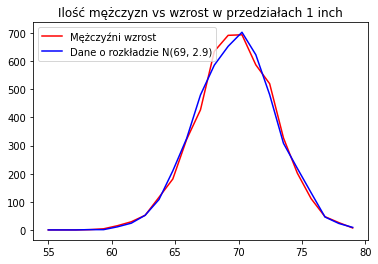

In [14]:
plt.title(f"Ilość mężczyzn vs wzrost w przedziałach {interval_h} inch")
plt.plot(male_n_h, male_h_grouped, "-r", label="Mężczyźni wzrost")
plt.plot(male_std_n_h, pdf_h_grouped, "-b", label=f"Dane o rozkładzie N({m_h:.0f}, {sigma_h:.1f})")
plt.legend(loc="upper left")
plt.show()

## Analiza wagi i wzrosu kobiet

In [15]:
df_female.describe()

,Height,Weight
count,5000.000000,5000.000000
mean,63.708774,135.860093
std,2.696284,19.022468
min,54.263133,64.700127
25%,61.894441,122.934096
50%,63.730924,136.117583
75%,65.563565,148.810926
max,73.389586,202.237214


In [16]:
female_max_w = max(df_female['Weight'])
female_max_h = max(df_female['Height'])
female_w = df_female['Weight'].to_numpy()
female_h = df_female['Height'].to_numpy()

female_h_std = df_female['Height'].to_numpy().std()
female_h_mean = df_female['Height'].mean()
female_w_std = df_female['Weight'].to_numpy().std()
female_w_mean = df_female['Weight'].mean()

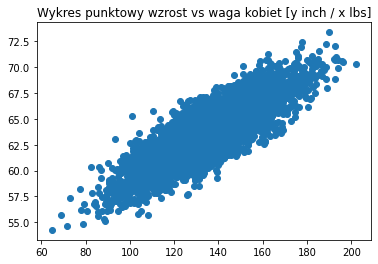

In [17]:
plt.title("Wykres punktowy wzrost vs waga kobiet [y inch / x lbs]")
plt.scatter(female_w, female_h)
plt.show()

In [18]:
interval_w  = 1
start_w = 55
female_bins_w = np.arange(start_w, female_max_w, interval_w)
female_w_by_interval = df_female.groupby(pd.cut(df_female['Weight'], female_bins_w)).count()

female_n_w = np.linspace(start_w, start_w + len(female_bins_w), len(female_bins_w) - 1)
female_w_grouped = female_w_by_interval['Weight']

In [19]:
# utworzenie danych dla wyktresu o rozkładzie normalnym dla wagi kobiet
female_m_w, female_sigma_w = female_w_mean, female_w_std
female_norm = np.random.normal(female_m_w, female_sigma_w, len(df_female))
female_std_n_w = np.linspace(start_w, start_w + len(female_bins_w), len(female_bins_w) - 1)
female_pdf_w_df = pd.DataFrame({'pdf_w': female_norm})
female_pdf_w_by_interval = pdf_w_df.groupby(pd.cut(female_pdf_w_df['pdf_w'], female_bins_w)).count()
female_pdf_w_grouped = female_pdf_w_by_interval['pdf_w']

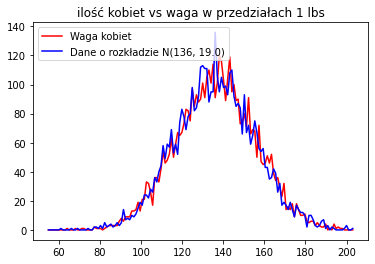

In [20]:
plt.title(f"ilość kobiet vs waga w przedziałach {interval_w} lbs")
plt.plot(female_n_w, female_w_grouped, "-r", label=f"Waga kobiet")
plt.plot(female_std_n_w, female_pdf_w_grouped, "-b", label=f"Dane o rozkładzie N({female_m_w:.0f}, {female_sigma_w:.1f})")
plt.legend(loc="upper left")
plt.show()

In [21]:
female_interval_h  = 1
female_start_h = 55
female_bins_h = np.arange(female_start_h, female_max_h, female_interval_h)
female_w_by_interval = df_female.groupby(pd.cut(df_female['Height'], female_bins_h)).count()

female_n_h = np.linspace(female_start_h, female_start_h + len(female_bins_h), len(female_bins_h) - 1)
female_h_grouped = female_w_by_interval['Height']

In [22]:
# utworzenie danych dla wyktresu o rozkładzie normalnym dla wagi kobiet
female_m_h, female_sigma_h = female_h_mean, female_h_std
female_norm = np.random.normal(female_m_h, female_sigma_h, len(df_female))
female_std_n_h = np.linspace(female_start_h, female_start_h + len(female_bins_h), len(female_bins_h) - 1)
female_pdf_h_df = pd.DataFrame({'pdf_h': female_norm})
female_pdf_h_by_interval = pdf_h_df.groupby(pd.cut(female_pdf_h_df['pdf_h'], female_bins_h)).count()
female_pdf_h_grouped = female_pdf_h_by_interval['pdf_h']

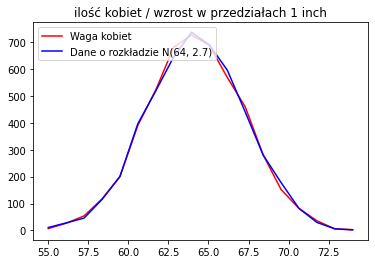

In [23]:
plt.title(f"ilość kobiet / wzrost w przedziałach {female_interval_h} inch")
plt.plot(female_n_h, female_h_grouped, "-r", label=f"Waga kobiet")
plt.plot(female_std_n_h, female_pdf_h_grouped, "-b", label=f"Dane o rozkładzie N({female_m_h:.0f}, {female_sigma_h:.1f})")
plt.legend(loc="upper left")
plt.show()

## Kobiety i Mężczyźni wykresy

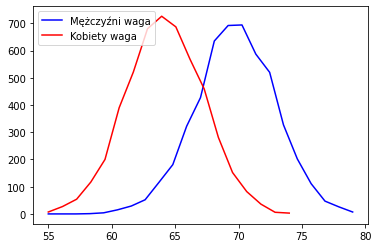

In [24]:
plt.plot(male_n_h, male_h_grouped, "-b", label="Mężczyźni waga")
plt.plot(female_n_h, female_h_grouped, "-r", label="Kobiety waga")
plt.legend(loc="upper left")
plt.show()

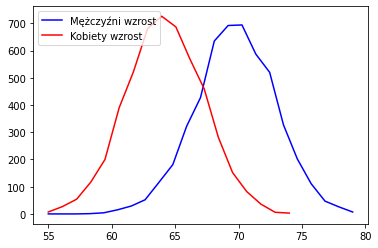

In [25]:
plt.plot(male_n_h, male_h_grouped, "-b", label="Mężczyźni wzrost")
plt.plot(female_n_h, female_h_grouped, "-r", label="Kobiety wzrost")
plt.legend(loc="upper left")
plt.show()

# Podsumowanie

Wzrost oraz waga zawarte w danych:
- mają rozkłady normalny (stwierdzone poprzez zestawienie z danymi o znanym rozkładzie)
- rozkład wagi jak i wzrostu zarówno kobiet jak i mężczyzn ma takie same odchylenie sdtandardowe dla wagi $\approx$ 19 [lbs] oraz dla wzrostu $\approx$ 2.7 [inch] 